In [2]:
#Import all required liabraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

In [3]:
#Read the source file (Raw data having Air Quality Sample values)
dt= pd.read_csv("./AirQualityUCI.csv")

In [4]:
#Glimpse of dataset by selecting top 5 rows 
dt.head(5)
#Assign a new dataframe for calculation just as a safe side
df=dt
#See top 5 rows to understand how data looks like 
df.head(5)

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  3/10/2004  18:00:00     2.6         1360       150      11.9   
1  3/10/2004  19:00:00     2.0         1292       112       9.4   
2  3/10/2004  20:00:00     2.2         1402        88       9.0   
3  3/10/2004  21:00:00     2.2         1376        80       9.2   
4  3/10/2004  22:00:00     1.6         1272        51       6.5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0           1046      166          1056      113          1692         1268   
1            955      103          1174       92          1559          972   
2            939      131          1140      114          1555         1074   
3            948      172          1092      122          1584         1203   
4            836      131          1205      116          1490         1110   

      T    RH      AH  
0  13.6  48.9  0.7578  
1  13.3  47.7  0.7255  
2  11.9  54.0  0.7502  
3  11.0  60.0  0.7867  
4  11.2  59.6  0.7888

In [5]:
# Below section of code will rename the columns for better readability 

df = df.rename(columns={
                        'CO(GT)' : 'CarbonMonoxide',
                        'PT08.S1(CO)' : 'TinOxide', 
                        'NMHC(GT)' : 'NonMetalicHydrocarbon', 
                        'C6H6(GT)' : 'Benzene',  
                        'PT08.S2(NMHC)' : 'Titania', 
                        'NOx(GT)' : 'NitrogenOxide', 
                        'PT08.S3(NOx)' : 'TungstenOxideNOx', 
                        'NO2(GT)' : 'NitrogenDioxide', 
                        'PT08.S4(NO2)' : 'TungstenOxideNO2', 
                        'PT08.S5(O3)' : 'IndiumOxide', 
                        'T' : 'Temperature', 
                        'RH' : 'RelativeHumidity', 
                        'AH' : 'AbsoluteHumidity'    
                       })

In [6]:
#Check the column names after change
df.columns


Index(['Date', 'Time', 'CarbonMonoxide', 'TinOxide', 'NonMetalicHydrocarbon',
       'Benzene', 'Titania', 'NitrogenOxide', 'TungstenOxideNOx',
       'NitrogenDioxide', 'TungstenOxideNO2', 'IndiumOxide', 'Temperature',
       'RelativeHumidity', 'AbsoluteHumidity'],
      dtype='object')

In [7]:
#See top 5 rows to understand how data looks like after changing column names
df.head(5)

Date      Time  CarbonMonoxide  TinOxide  NonMetalicHydrocarbon  \
0  3/10/2004  18:00:00             2.6      1360                    150   
1  3/10/2004  19:00:00             2.0      1292                    112   
2  3/10/2004  20:00:00             2.2      1402                     88   
3  3/10/2004  21:00:00             2.2      1376                     80   
4  3/10/2004  22:00:00             1.6      1272                     51   

   Benzene  Titania  NitrogenOxide  TungstenOxideNOx  NitrogenDioxide  \
0     11.9     1046            166              1056              113   
1      9.4      955            103              1174               92   
2      9.0      939            131              1140              114   
3      9.2      948            172              1092              122   
4      6.5      836            131              1205              116   

   TungstenOxideNO2  IndiumOxide  Temperature  RelativeHumidity  \
0              1692         1268         13.6              48.9   
1              1559          972         13.3              47.7   
2              1555         1074         11.9              54.0   
3              1584         1203         11.0              60.0   
4              1490         1110         11.2              59.6   

   AbsoluteHumidity  
0            0.7578  
1            0.7255  
2            0.7502  
3            0.7867  
4            0.7888

In [8]:
df[df == -200]=np.NAN

In [9]:
# Considering we dont have any business logic to fill null/dirty values we will drop them as of now 
df=df.dropna()

In [10]:
# Let's see how much good data we have 
df.shape

(827, 15)

In [11]:
df.columns

Index(['Date', 'Time', 'CarbonMonoxide', 'TinOxide', 'NonMetalicHydrocarbon',
       'Benzene', 'Titania', 'NitrogenOxide', 'TungstenOxideNOx',
       'NitrogenDioxide', 'TungstenOxideNO2', 'IndiumOxide', 'Temperature',
       'RelativeHumidity', 'AbsoluteHumidity'],
      dtype='object')

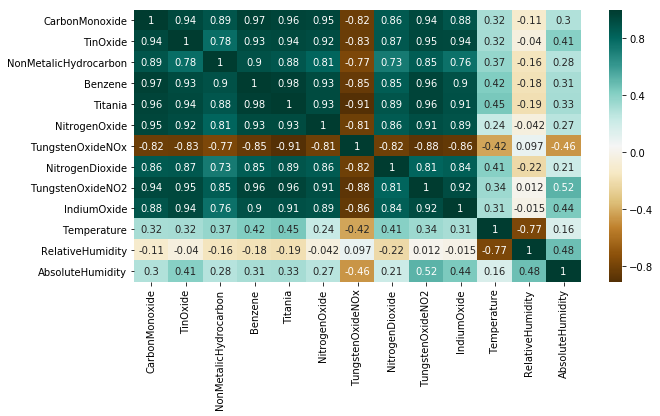

In [12]:
# Time to visualise correlation by heatmap and understand the feature importance
plt.subplots(figsize=(10,5))
sns.heatmap(df.corr(),cmap="BrBG",annot=True)

In [13]:
df.columns

Index(['Date', 'Time', 'CarbonMonoxide', 'TinOxide', 'NonMetalicHydrocarbon',
       'Benzene', 'Titania', 'NitrogenOxide', 'TungstenOxideNOx',
       'NitrogenDioxide', 'TungstenOxideNO2', 'IndiumOxide', 'Temperature',
       'RelativeHumidity', 'AbsoluteHumidity'],
      dtype='object')

Comments here 

In [14]:
features=['Temperature','IndiumOxide','TungstenOxideNO2']
X=df[features]
y=df['RelativeHumidity']

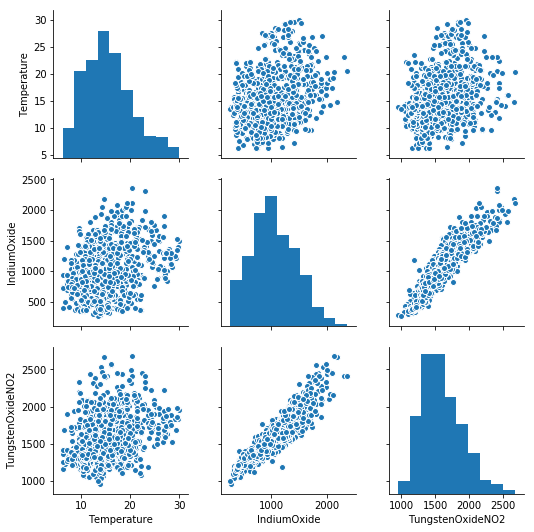

In [15]:
sns.pairplot(X,diag_kind='hist')
plt.show()

In [16]:
#df.drop(['State'],1,inplace=True)
#feature_cols = ['Murder','Assault','UrbanPop','Rape']
#x=df[feature_cols]

In [17]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
dff=ss.fit_transform(X)

In [18]:
dff.std()

1.0

In [19]:
dff.dtype

dtype('float64')

In [20]:
import numpy as np
from scipy.spatial.distance import cdist

In [21]:
ssw = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(dff)
    ssw.append(sum(np.min(cdist(dff, kmeanModel.cluster_centers_, 'cityblock'), axis=1)) / dff.shape[0])

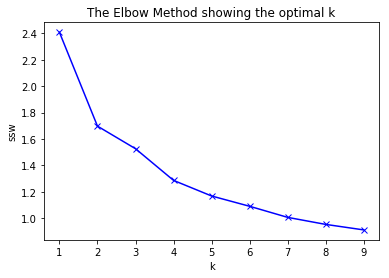

In [22]:
plt.plot(K, ssw, 'bx-')
plt.xlabel('k')
plt.ylabel('ssw')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [23]:
my_kmeans=KMeans(n_clusters=5)

In [24]:
km_model=my_kmeans.fit(dff)

In [25]:
km_model.cluster_centers_

array([[-0.46738639,  0.17145627,  0.04738987],
       [-0.91291871, -1.02011611, -1.02896355],
       [ 1.72645915,  0.59773175,  0.57801221],
       [ 0.5167136 , -0.75280776, -0.62740934],
       [ 0.179183  ,  1.44774892,  1.53556085]])

In [26]:
size=km_model.labels_
size=list(size)
size

[0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 4,
 4,
 4,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 4,
 4,
 4,
 4,
 0,
 4,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 4,
 2,
 3,
 3,
 3,
 0,
 0,
 0,
 4,
 4,
 4,
 4,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 2,
 3,
 3,
 3,
 2,
 2,
 2,
 4,
 4,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 4,
 4,
 4,
 4,
 2,
 2,
 2,
 2,
 2,
 2,
 4,
 4,
 4,
 4,
 4,
 0,
 0,
 0,
 3,
 1,
 1,
 0,
 0,
 4,
 4,
 4,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 4,
 4,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 4,
 4,
 4,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 4,
 4,
 4,
 4,
 4,
 0,
 0,
 0,
 1,
 1,
 0,
 4,
 4,
 3,
 3,
 4,
 4,
 4,
 0,
 0,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 4,
 0,
 0,
 3,
 3,
 3,
 0,
 0,
 0,
 4,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 3,
 3,
 3,
 3,
 0,
 4,
 4,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 4,


In [27]:
## Size of each cluster 
print(size.count(0))
print(size.count(1))
print(size.count(2))
print(size.count(3))
print(size.count(4))

223
201
107
148
148


In [28]:
df['Cluster'] = km_model.labels_
df.head()

Date      Time  CarbonMonoxide  TinOxide  NonMetalicHydrocarbon  \
0  3/10/2004  18:00:00             2.6    1360.0                  150.0   
1  3/10/2004  19:00:00             2.0    1292.0                  112.0   
2  3/10/2004  20:00:00             2.2    1402.0                   88.0   
3  3/10/2004  21:00:00             2.2    1376.0                   80.0   
4  3/10/2004  22:00:00             1.6    1272.0                   51.0   

   Benzene  Titania  NitrogenOxide  TungstenOxideNOx  NitrogenDioxide  \
0     11.9   1046.0          166.0            1056.0            113.0   
1      9.4    955.0          103.0            1174.0             92.0   
2      9.0    939.0          131.0            1140.0            114.0   
3      9.2    948.0          172.0            1092.0            122.0   
4      6.5    836.0          131.0            1205.0            116.0   

   TungstenOxideNO2  IndiumOxide  Temperature  RelativeHumidity  \
0            1692.0       1268.0         13.6              48.9   
1            1559.0        972.0         13.3              47.7   
2            1555.0       1074.0         11.9              54.0   
3            1584.0       1203.0         11.0              60.0   
4            1490.0       1110.0         11.2              59.6   

   AbsoluteHumidity  Cluster  
0            0.7578        0  
1            0.7255        0  
2            0.7502        0  
3            0.7867        0  
4            0.7888        0

In [29]:
clust_profile = pd.pivot_table(df, values=['Temperature','IndiumOxide','TungstenOxideNO2'],index='Cluster',aggfunc=np.mean)
clust_profile

IndiumOxide  Temperature  TungstenOxideNO2
Cluster                                            
0        1114.376682    13.347534       1614.937220
1         637.875622    11.199005       1289.761194
2        1284.841121    23.927103       1775.242991
3         744.770270    18.093243       1411.074324
4        1624.756757    16.465541       2064.527027

In [30]:
cluster_profile_state = pd.DataFrame({'labels':df['Cluster'], 'RelativeHumidity':df['RelativeHumidity']})
cluster_profile_state.sort_values('labels')


labels  RelativeHumidity
0          0              48.9
881        0              46.7
400        0              36.1
399        0              50.5
386        0              51.1
385        0              48.0
384        0              45.6
880        0              48.7
383        0              43.3
892        0              80.1
893        0              81.0
377        0              35.3
376        0              44.1
894        0              80.6
374        0              59.6
891        0              79.4
879        0              51.4
876        0              75.3
875        0              76.4
870        0              66.8
871        0              69.6
872        0              71.9
424        0              36.9
423        0              50.1
416        0              62.2
415        0              58.1
414        0              55.9
413        0              56.1
412        0              50.8
411        0              48.1
...      ...               ...
160        4              40.1
159        4              50.0
158        4              60.2
148        4              45.9
147        4              41.3
172        4              44.1
1057       4              36.7
303        4              69.7
327        4              56.9
865        4              47.8
866        4              49.8
867        4              53.2
877        4              71.0
878        4              61.1
883        4              62.5
884        4              75.7
885        4              77.4
886        4              74.9
887        4              76.0
888        4              76.3
889        4              78.0
890        4              78.0
375        4              57.0
362        4              52.5
361        4              47.8
1046       4              53.3
1047       4              42.1
337        4              67.3
863        4              35.5
1230       4              66.8

[827 rows x 2 columns]

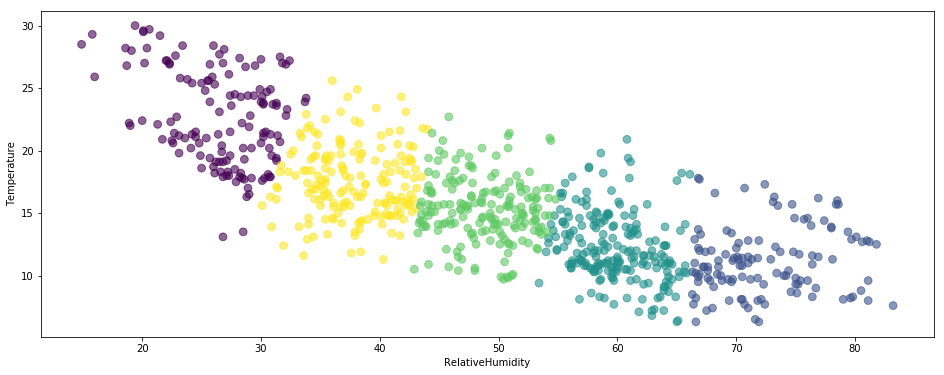

In [31]:
k_means = KMeans(n_clusters=5, init='k-means++', random_state=5000)
k_means.fit(df[['Temperature', 'RelativeHumidity']])
fig = plt.figure(figsize=(16,6))
plt.scatter(df['RelativeHumidity'],df['Temperature'],60,c=k_means.labels_, alpha = 0.6)
plt.xlabel('RelativeHumidity')
plt.ylabel('Temperature')
#[plt.text(row.RelativeHumidity, row.Temperature, row.RelativeHumidity) for row in df.itertuples()]
plt.show()